In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from scipy import ndimage

In [2]:
# function for cross correlation
def cross_correlation(image, kernel, k): # the input image is padded
    new_img = np.zeros((image.shape[0] - 2*k,image.shape[1] - 2*k))
    for i in range(image.shape[0] - 2*k):
        for j in range(image.shape[1] - 2*k):
            new_img[i, j] = np.sum(image[i:i+ 2*k + 1, j:j+ 2*k + 1]*kernel) # cross_correlation
    return new_img

In [3]:
# problem 1
def Gradient_Magnitude(img):
    # x_filter = np.array([[1, 2, 1],[0, 0, 0],[-1,-2,-1]])
    # y_filter = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
    x_filter = np.array([[0, 0, 0],[0, -1, 0],[0, 1, 0]])
    y_filter = np.array([[0, 0, 0],[0, -1, 1],[0, 0, 0]])
    img = np.pad(img,(1,1),'constant')
    x_gradient = cross_correlation(img, x_filter,1)
    y_gradient = cross_correlation(img, y_filter,1)
    # x_gradient = ndimage.correlate(img, x_filter)
    # y_gradient = ndimage.correlate(img, y_filter)
    return np.sqrt(x_gradient*x_gradient + y_gradient*y_gradient)

In [25]:
# problem 2
def Laplacian_(img):
    filter = np.array([[0, 1, 0],[1, -4, 1],[0, 1, 0]])
    img = ndimage.gaussian_filter(img, sigma=1)
    img_padded = np.pad(img,(1,1),'edge')
    laplace = cross_correlation(img_padded,filter ,1)
    # laplace = ndimage.convolve(img,filter)
    return laplace

In [33]:
# problem 3
def Zero_Crossings(img):
    new_img = np.ones(img.shape)
    img = np.pad(img,(1,1),'constant')
    for i in range(1,img.shape[0]-2):
        for j in range(1,img.shape[1]-2):
            region = img[i-1:i+2,j-1:j+2]
            max_val = np.max(region)
            min_val = np.min(region)
            if img[i][j] == 0.0 and max_val > 0 and min_val < 0: # +, 0, - or -, 0, +
                new_img[i,j] = 0
            elif img[i][j] > 0:
                if min_val < 0:  # +, -
                    new_img[i,j] = 0  
            else:
                if max_val > 0: # -, +
                    new_img[i,j] = 0

    return new_img


In [6]:
# problem 4
def Laplacian_Edge_Detection(img, threshold):
    gradient = Gradient_Magnitude(img)
    gradient[gradient <= threshold] = 0
    gradient[gradient > threshold] = 1
    laplacian = Laplacian_(img)
    laplacian = Zero_Crossings(laplacian)
    return np.logical_and(gradient, laplacian)


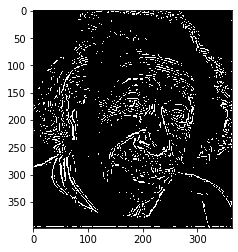

In [43]:
# test
img = cv2.imread('./Image1.png',0) 
new_img = Laplacian_Edge_Detection(img,10)
plt.imshow(new_img.astype(int), cmap = 'gray')